### Import TensorFlow

In [1]:
import tensorflow as tf

#tf.logging.set_verbosity(tf.logging.ERROR)
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.12.0


### Import MNIST

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Shapes of Imported Arrays

In [3]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


### Plot an Image Example

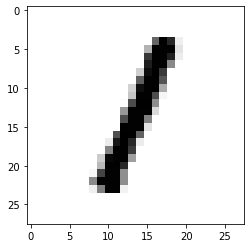

In [4]:
from matplotlib import pyplot as plt
#to display images within the notebook
%matplotlib inline 

plt.imshow(x_train[18019], cmap='binary')
plt.show()

### Display Labels

In [5]:
y_train[18019]

1

In [6]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


### Encoding Labels

In [7]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

### Validated Shapes

In [8]:
print('y_train_encoded shape:', y_train_encoded.shape)
print('y_test_encoded shape:', y_test_encoded.shape)

y_train_encoded shape: (60000, 10)
y_test_encoded shape: (10000, 10)


### Display Encoded Labels

In [9]:
y_train_encoded[18019]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Unrolling N-dimensional Arrays to Vectors

In [10]:
import numpy as np

x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

print('x_train_reshaped shape:', x_train_reshaped.shape)
print('x_test_reshaped shape:', x_test_reshaped.shape)

x_train_reshaped shape: (60000, 784)
x_test_reshaped shape: (10000, 784)


### Display Pixel Values

In [11]:
print(set(x_train_reshaped[18019]))

{0, 128, 4, 7, 9, 13, 16, 19, 154, 28, 156, 160, 38, 171, 45, 48, 176, 178, 179, 51, 57, 187, 196, 197, 70, 200, 76, 84, 214, 216, 224, 225, 96, 231, 104, 127, 240, 241, 114, 113, 117, 118, 246, 123, 252, 253, 254, 255}


### Data Normalization

In [12]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

epsilon = 1e-10

x_train_norm = (x_train_reshaped - x_mean) / (x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean) / (x_std + epsilon)

### Display Normalized Pixel Values

In [13]:
print(set(x_train_norm[18019]))

{-0.4240738943910262, 1.5360243604004349, 2.7960875241949457, 2.325154826615179, 0.5432473222593053, 2.7833596134495466, 2.1215082546887936, 2.426978112578372, 2.439706023323771, 1.0778195735660674, 2.6433525952501564, 2.8215433456857437, 2.083324522452596, 1.7523988430722195, 2.070596611707197, 2.706992148977152, 0.1486820891519332, 1.1414591272930628, 0.4668798577869107, 0.7978055371672873, 0.059586713934139515, 0.18686582138813052, 1.816038396799215, 2.8088154349403447, 1.8414942182900134, 1.8542221290354124, 1.1923707702746593, 0.89962882313048, 1.2050986810200583, -0.22042732246464067, -0.18224359022844336, 0.2250495536243278, 1.5614801818912332, -0.3731622514094298, 2.5160734877961657, 0.3014170180967224, -0.33497851917323257, 1.6123918248728295, 0.6450706082224981, -0.06769239351985147, -0.30952269768243434, 1.9560454149986053, 1.0141800198390718, 2.6306246845047574, 2.299699005124381, 1.0650916628206684, -0.25861105470083795, 1.026907930584471}


### Creating the Model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

### Compiling the Model

In [15]:
model.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


### Training the Model

In [16]:
model.fit(x_train_norm, y_train_encoded, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3805 - accuracy: 0.8881
Epoch 2/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1896 - accuracy: 0.9445
Epoch 3/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1443 - accuracy: 0.9580


### Evaluating the Model

In [17]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print('Test set accuracy:', accuracy*100)

313/313 [==============================] - 0s 1ms/step - loss: 0.1332 - accuracy: 0.9613
Test set accuracy: 96.13000154495239


### Predictions on Test Set

In [18]:
preds = model.predict(x_test_norm)
print('Shape of the preds:', preds.shape)

313/313 [==============================] - 0s 859us/step
Shape of the preds: (10000, 10)


### Plotting the Results

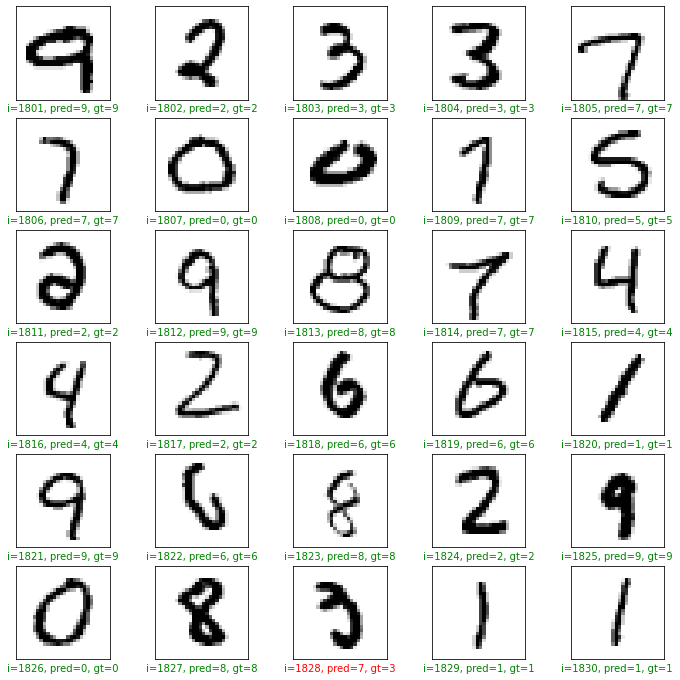

In [19]:
plt.figure(figsize=(12,12))

start_index = 1801

for i in range(30):
    plt.subplot(6,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(preds[start_index+i])
    gt = y_test[start_index+i]
    
    col = 'g'
    if pred != gt:
        col = 'r'
        
    plt.xlabel('i={}, pred={}, gt={}'.format(start_index+i, pred, gt), color=col)
    plt.imshow(x_test[start_index+i], cmap='binary')
plt.show()

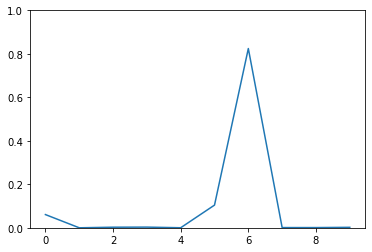

In [20]:
plt.plot(preds[1819])
plt.ylim([0,1])
plt.show()